# Transfer Learning with PyTorch

In this notebook, I will show you how to use transfer learning to train a model on a dataset that is different from the one it was originally trained on. 

- Foundataion Model: VGG16
- Original Dataset: ImageNet
- New Dataset: Cats vs Dogs

# Download Dataset

Download Cat Dog dataset from [Microsoft](https://www.microsoft.com/en-us/download/details.aspx?id=54765) and extract it to the current directory.

In [4]:
# download the zip file via url and save it as cats_dogs_dataset.zip
!wget -O cats_dogs_dataset.zip https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-08-20 00:08:08--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 2001:b034:700:6a3::317f, 2001:b034:700:6aa::317f, 163.28.224.206
Connecting to download.microsoft.com (download.microsoft.com)|2001:b034:700:6a3::317f|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘cats_dogs_dataset.zip’

cats_dogs_dataset.z 100%[===================>] 786.67M   109MB/s    in 7.3s    

2024-08-20 00:08:15 (108 MB/s) - ‘cats_dogs_dataset.zip’ saved [824887076/824887076]



In [5]:
# unzip the file
!unzip cats_dogs_dataset.zip

Archive:  cats_dogs_dataset.zip
   creating: PetImages/Cat/
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflating: PetImages/Cat/10010.jpg  
  inflating: PetImages/Cat/10011.jpg  
  inflating: PetImages/Cat/10012.jpg  
  inflating: PetImages/Cat/10013.jpg  
  inflating: PetImages/Cat/10014.jpg  
  inflating: PetImages/Cat/10015.jpg  
  inflating: PetImages/Cat/10016.jpg  
  inflating: PetImages/Cat/10017.jpg  
  inflatin

# Download the package

In [ ]:
%pip install -r requirements.txt

# Visualize the data

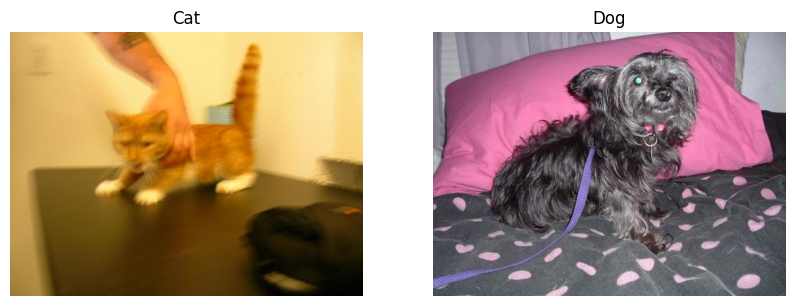

In [24]:
import matplotlib.pyplot as plt
import PIL

cat_img_path = './PetImages/Cat/0.jpg'
dog_img_path = './PetImages/Dog/0.jpg'

cat_img = PIL.Image.open(cat_img_path)
dog_img = PIL.Image.open(dog_img_path)

plt.figure(figsize=(10, 5))
# Cat
plt.subplot(1, 2, 1)
plt.imshow(cat_img)
plt.title('Cat')
plt.axis('off')
# Dog
plt.subplot(1, 2, 2)
plt.imshow(dog_img)
plt.title('Dog')
plt.axis('off')
plt.show()

# Create Dataset and DataLoader

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [29]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [30]:
dataset = datasets.ImageFolder(root='PetImages', transform=transform)

In [31]:
print(f"Number of images: {len(dataset)}")
print(f"Number of classes: {len(dataset.classes)}")
print(f"Classes: {dataset.classes}")
# show the len of each class
print(f"Dataset distribution:")
print(f"{dataset.classes[0]}: {dataset.targets.count(0)}")
print(f"{dataset.classes[1]}: {dataset.targets.count(1)}")

Number of images: 25000
Number of classes: 2
Classes: ['Cat', 'Dog']
Dataset distribution:
Cat: 12500
Dog: 12500


In [36]:
# split the dataset into train, val, test (70%, 20%, 10%)
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.2 * dataset_size)
test_size = dataset_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 17500
Validation dataset size: 5000
Test dataset size: 2500


In [37]:
# dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Assignments

1. train a classifier based on other pre-trained models
2. at least surpass 90% accuracy on the test set

Tips to improve the performance:
- Configure the hyperparameters such as learning rate, batch size, number of epochs, etc.
- Data Augmentation such as random crop, random flip, etc.

you can use pre-trained models such as:
- AlexNet
- VGG19
- ResNet18
- ResNet50

check the [torchvision.models](https://pytorch.org/vision/stable/models.html#classification) for more details.

<img src="./src/pre-trained_model.jpg" width="400">